In [1]:
import pandas as pd
import numpy as np

import rdkit
from rdkit import RDConfig, Chem
from rdkit.Chem import PandasTools, inchi

import random
import os

In [2]:
sdfFile_1 = os.path.join(RDConfig.RDDataDir,r"G:\My Drive\UPF\projects\dst\tox_evidence_combination_DST\data\curated\hakura_ames_curated.sdf")
sdfFile_2 = os.path.join(RDConfig.RDDataDir, r"G:\My Drive\UPF\projects\dst\tox_evidence_combination_DST\data\curated\hansen_ames_curated.sdf" )
sdfFile_3 = os.path.join(RDConfig.RDDataDir, r"G:\My Drive\UPF\projects\dst\tox_evidence_combination_DST\data\curated\predeep_ames_curated.sdf")
sdfFile_4_test = os.path.join(RDConfig.RDDataDir,r"G:\My Drive\UPF\projects\dst\Evidence\Gentox\QSAR_selection\test_Hansen.sdf")

df_Hakura = PandasTools.LoadSDF(sdfFile_1, smilesName='smiles',molColName='molecule', includeFingerprints=True)
df_Hansen = PandasTools.LoadSDF(sdfFile_2, smilesName='smiles',molColName='molecule', includeFingerprints=True)
df_Predeep = PandasTools.LoadSDF(sdfFile_3, smilesName='smiles',molColName='molecule', includeFingerprints=True)
df_test = PandasTools.LoadSDF(sdfFile_3, smilesName='smiles',molColName='molecule', includeFingerprints=True)

In [3]:
inchi_key = lambda mol : inchi.MolToInchiKey(mol)

df_Hakura['inchi'] = [inchi_key(mol) for mol in df_Hakura['molecule']]
df_Hansen['inchi'] = [inchi_key(mol) for mol in df_Hansen['molecule']]
df_Predeep['inchi'] = [inchi_key(mol) for mol in df_Predeep['molecule']]

In [4]:
intersection =  list(set(df_Hansen['inchi']).intersection(df_Predeep['inchi'], df_Hakura['inchi']))
intersection

[]

In [5]:
intersection2 =  list(set(df_Hansen['inchi']).intersection(df_Predeep['inchi']))
len(intersection2)

1416

In [36]:
selected = random.sample(intersection2,6)

In [37]:
selected_test_hansen = df_Hansen[df_Hansen['inchi'].isin(selected)]
selected_test_predeep = df_Predeep[df_Predeep['inchi'].isin(selected)]

In [42]:
selected_cas = selected_test_hansen.CAS.to_list()

,CAS,result,smiles,molecule
0,13114-72-2,0,CNC(=O)N(c1ccccc1)c1ccccc1,

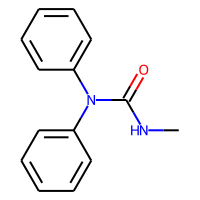

In [39]:
merged = pd.merge(selected_test_hansen,selected_test_predeep, how = 'inner', on = 'inchi' )
merged2 = merged.drop(columns=['ID_x', 'smiles_x','molecule_x','inchi','casrn', 'assay_result_num','compound_class','structure_curated_y','data_quality','ID_y','smiles_y'])
merged2.rename(columns={'structure_curated_x':'smiles','molecule_y':'molecule' },inplace=True)
merged2.head(1)

,casrn,assay_result_num,compound_class,structure_curated,data_quality,ID,smiles,molecule,inchi
0,100-00-5,1,organic,O=[N+]([O-])c1ccc(Cl)cc1,nan,1-Chloro-4-nitrobenzene,O=[N+]([O-])c1ccc(Cl)cc1,,CZGCEKJOLUNIFY-UHFFFAOYSA-N

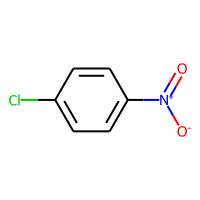

In [43]:
df_Predeep.head(1)

In [44]:
df_Predeep_rest = df_Predeep[~df_Predeep['casrn'].isin(merged2['CAS'])]
df_Predeep_rest.drop(['compound_class','smiles', 'inchi', 'data_quality'], inplace=True, axis=1)
df_Predeep_rest.rename(columns={'assay_result_num':'result','casrn':'CAS','structure_curated':'smiles', 'ID':'name'}, inplace=True)
df_Predeep_rest.reset_index(inplace=True, drop=True)

C:\Users\karol\anaconda3\envs\jupyter\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\karol\anaconda3\envs\jupyter\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [45]:
df_Predeep_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CAS       2086 non-null   object
 1   result    2086 non-null   object
 2   smiles    2086 non-null   object
 3   name      2086 non-null   object
 4   molecule  2086 non-null   object
dtypes: object(5)
memory usage: 81.6+ KB


,CAS,result,smiles,name,molecule
0,100-00-5,1,O=[N+]([O-])c1ccc(Cl)cc1,1-Chloro-4-nitrobenzene,

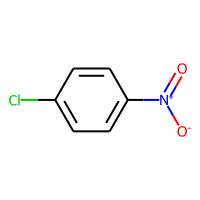

In [46]:
df_Predeep_rest.head(1)

In [47]:
df_Hansen_rest = df_Hansen[~df_Hansen['CAS'].isin(merged2['CAS'])]
df_Hansen_rest.drop(['inchi','structure_curated', 'ID'], inplace=True, axis=1)
df_Hansen_rest.reset_index(inplace=True, drop=True)

C:\Users\karol\anaconda3\envs\jupyter\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,CAS,result,smiles,molecule
0,2475-33-4,0,O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...,

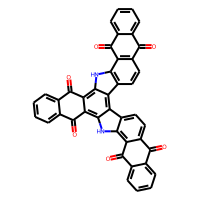

In [48]:
df_Hansen_rest.head(1)

,CAS,result,smiles,name,molecule
0,636-98-6,1,O=[N+]([O-])c1ccc(I)cc1,1-Iodo-4-nitrobenzene,

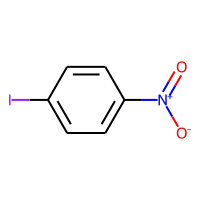

In [49]:
df_Hakura.drop(['inchi'], inplace=True, axis=1)
df_Hakura.rename(columns={'CAS_No.':'CAS','ID':'name'}, inplace=True)
df_Hakura.reset_index(inplace=True, drop=True)
df_Hakura.head(1)

In [50]:
PandasTools.WriteSDF(df_Hansen_rest, r"G:\My Drive\UPF\projects\dst\tox_evidence_combination_DST\data\curated\selected_intersection\hansen_ames_curated_selected.sdf", molColName='molecule', idName='CAS', properties=['smiles','result'])
PandasTools.WriteSDF(df_Predeep_rest, r"G:\My Drive\UPF\projects\dst\tox_evidence_combination_DST\data\curated\selected_intersection\predeep_ames_curated_selected.sdf", molColName='molecule', idName='CAS', properties=['smiles','result','name'])
PandasTools.WriteSDF(df_Hakura, r"G:\My Drive\UPF\projects\dst\tox_evidence_combination_DST\data\curated\selected_intersection\hakura_ames_curated_selected.sdf", molColName='molecule', idName='CAS', properties=['smiles','result','name'])
PandasTools.WriteSDF(merged2, r"G:\My Drive\UPF\projects\dst\tox_evidence_combination_DST\data\curated\selected_intersection\intersection_test.sdf", molColName='molecule', idName='CAS', properties=['smiles','result'])